In [5]:
%matplotlib inline
import sys
from simulation_toykit_sources import *

sys.path.append('../virtuallab/tools')
from common import *

def get_ipynb_dir():
    return "../virtuallab/pynb/sources/spherical_wave/"

notebook_dir = get_ipynb_dir()
degree       = np.pi/180
wavelength   = 0.5
start  = [-5, -5] # 'um'
end    = [5, 5]
shape  = [100, 100]

step   = [(b-a)/N for a,b,N in zip(start, end, shape)]
meta   = {
    "dx" : step[0] * 1e-3, # set display unit to 'mm'
    "dy" : step[1] * 1e-3,
    "nx" : shape[0],
    "ny" : shape[1]
}

display_pos = [[0,0], [0,1], [1, 0], [1, 1]]
# display_pos = [[0,0], [0,1], [0,2], [0,3]]

* spherical wave with z=0.25um
    max error = 0.6210885026723939


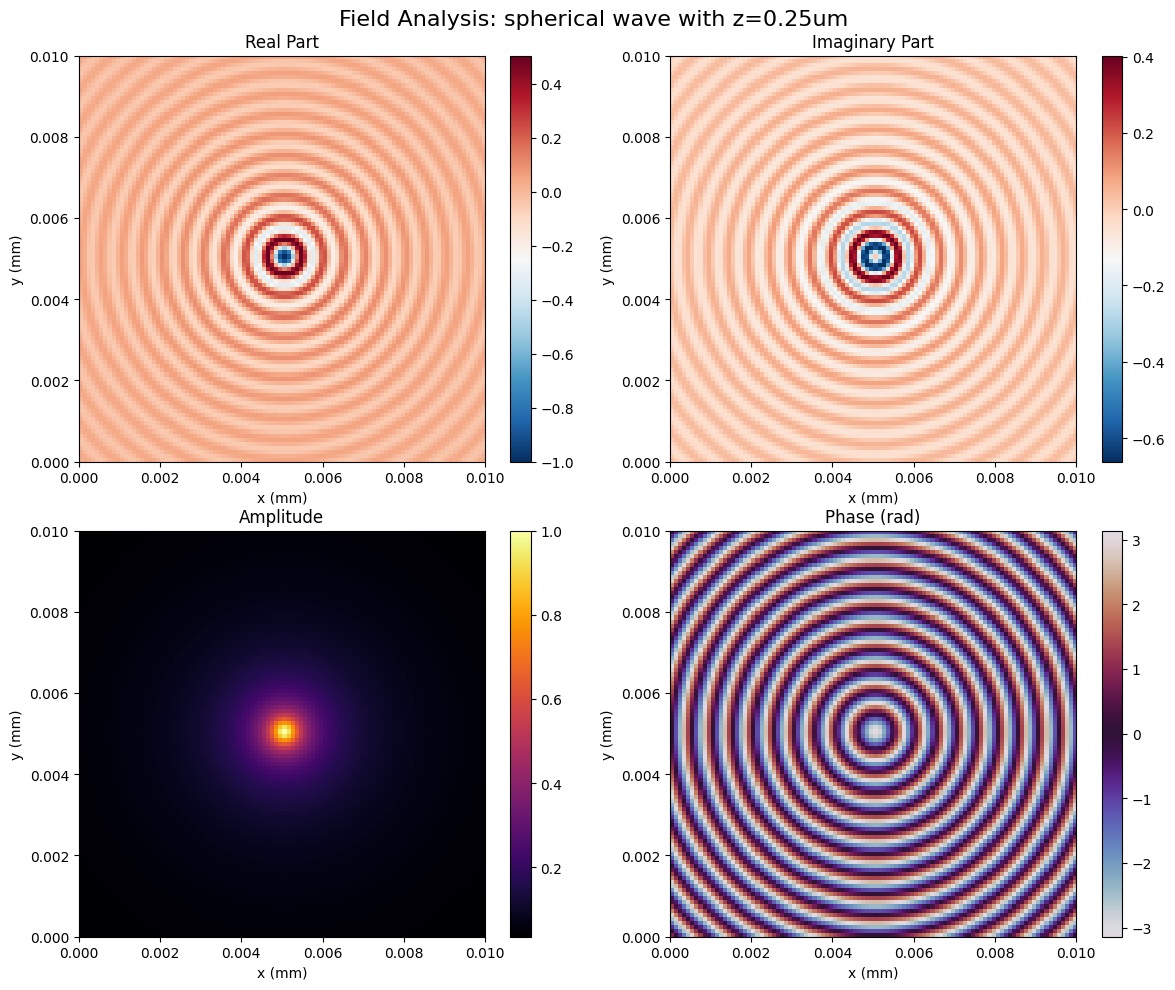

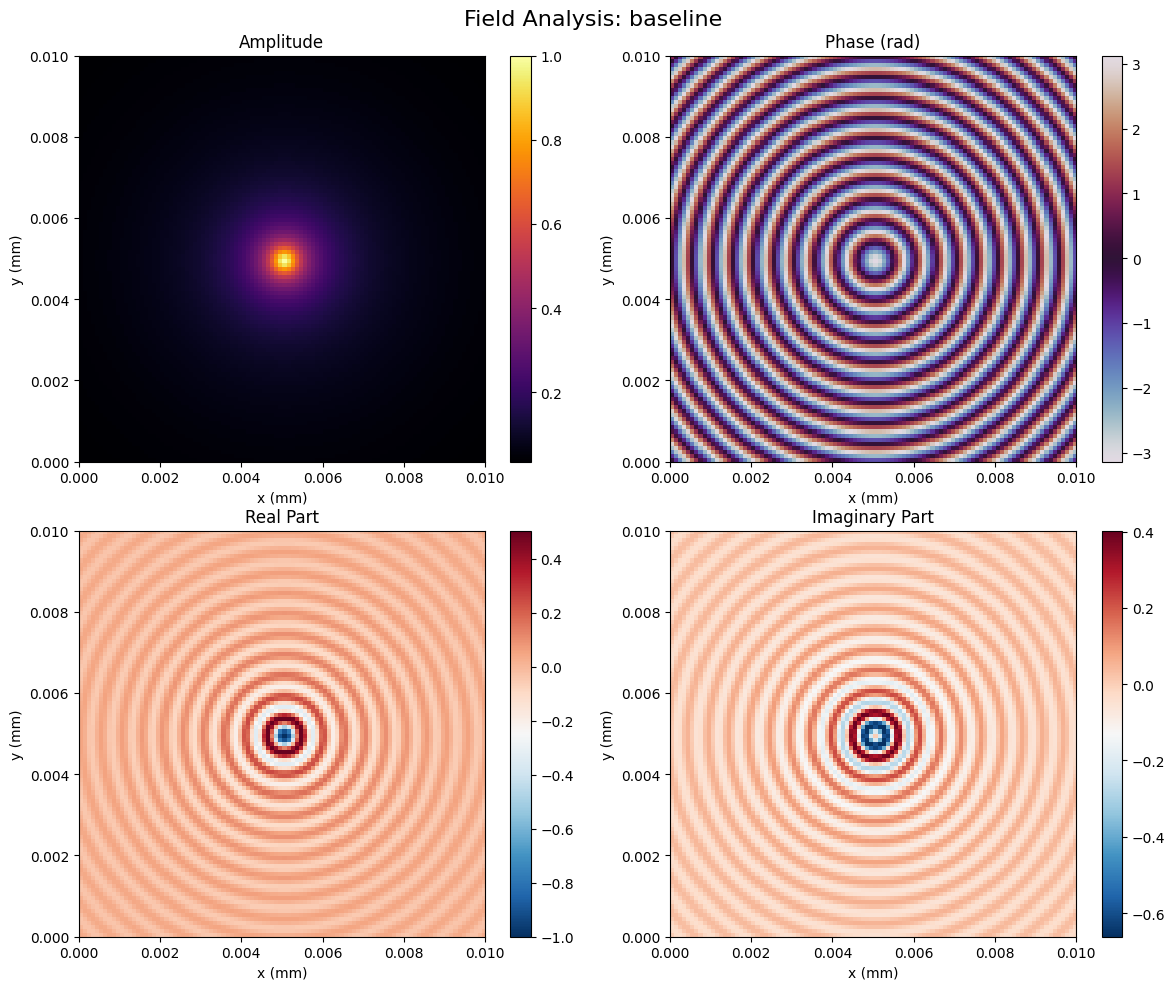

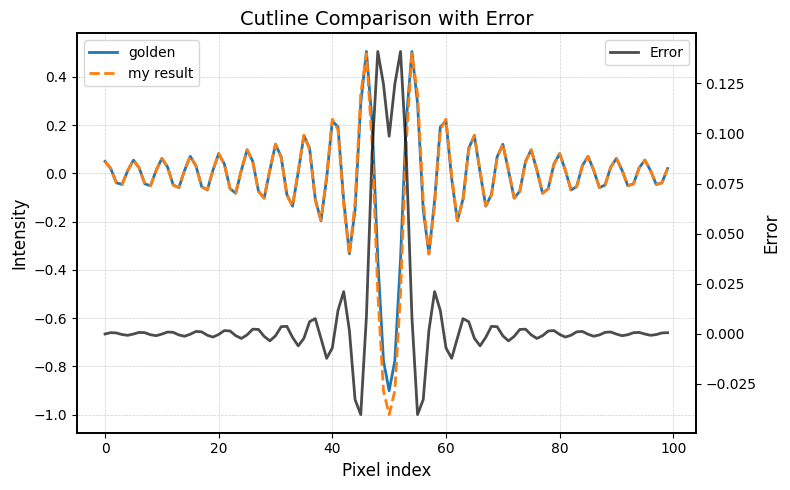

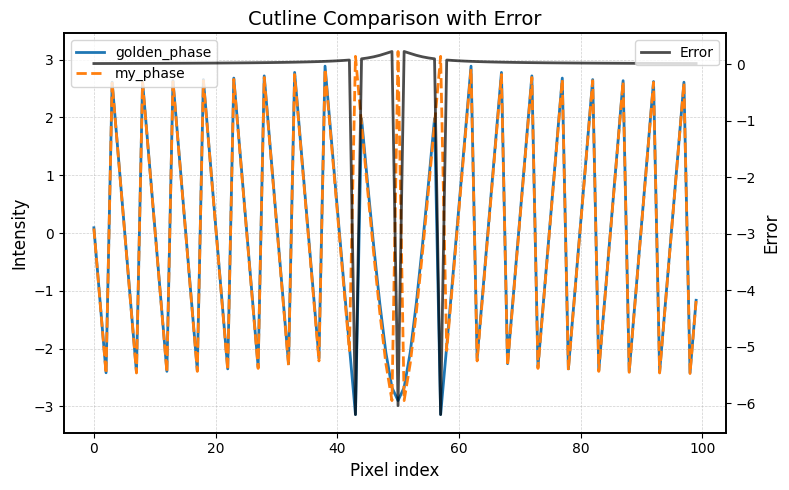

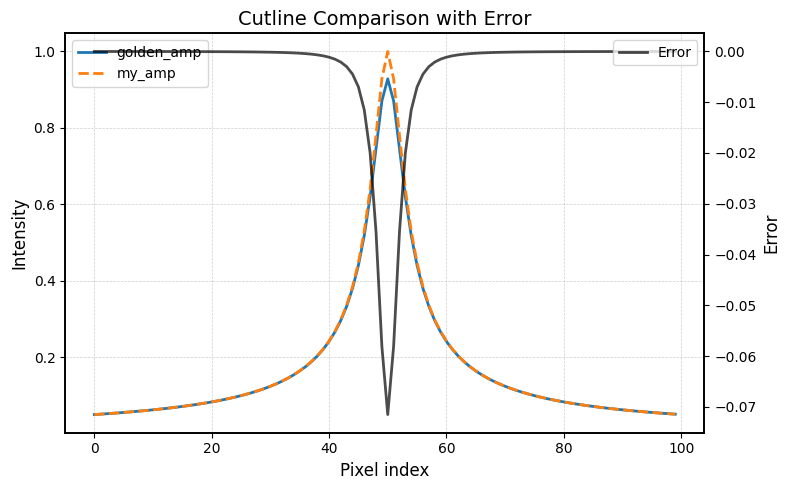

* spherical wave with z=0.5um
    max error = 0.6100350457846935


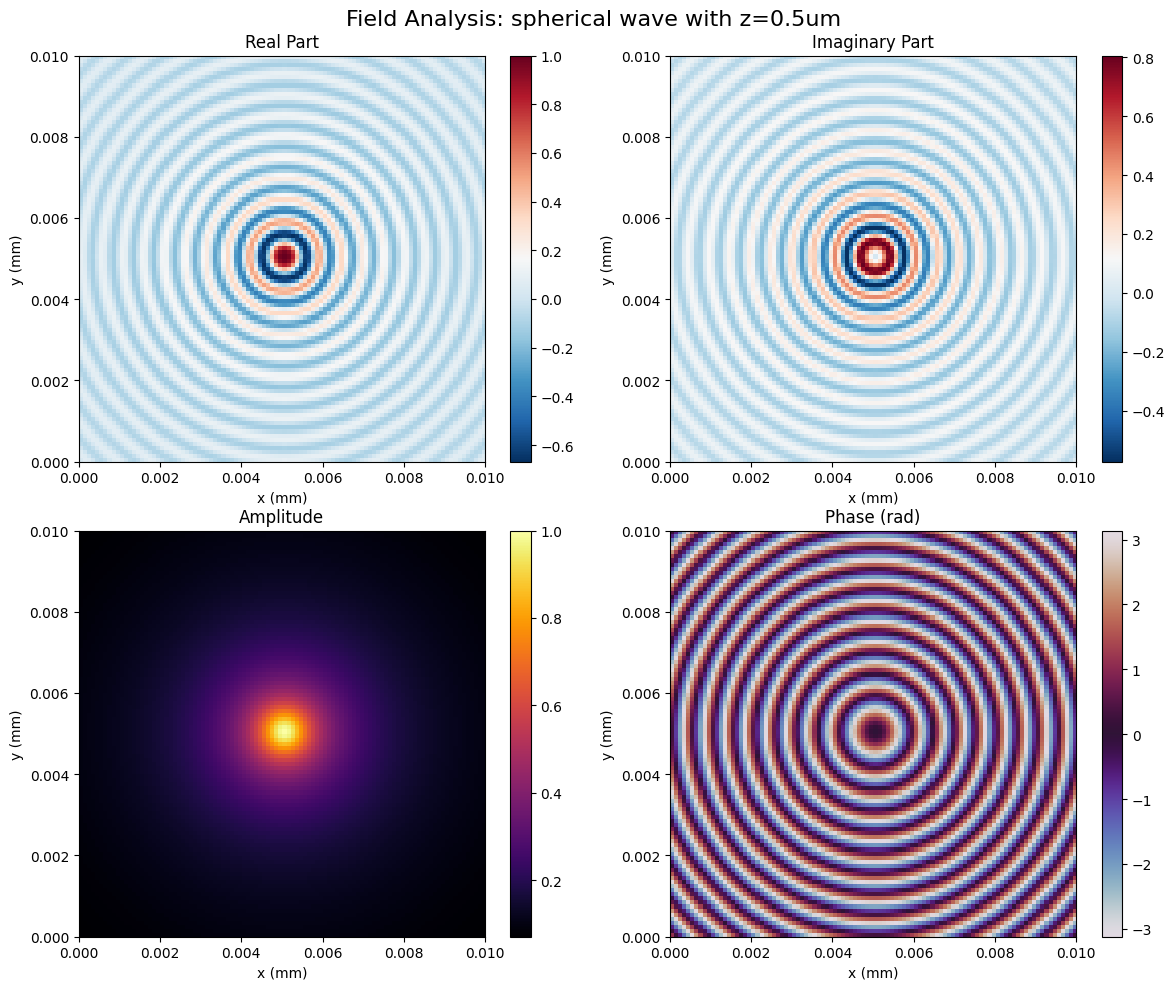

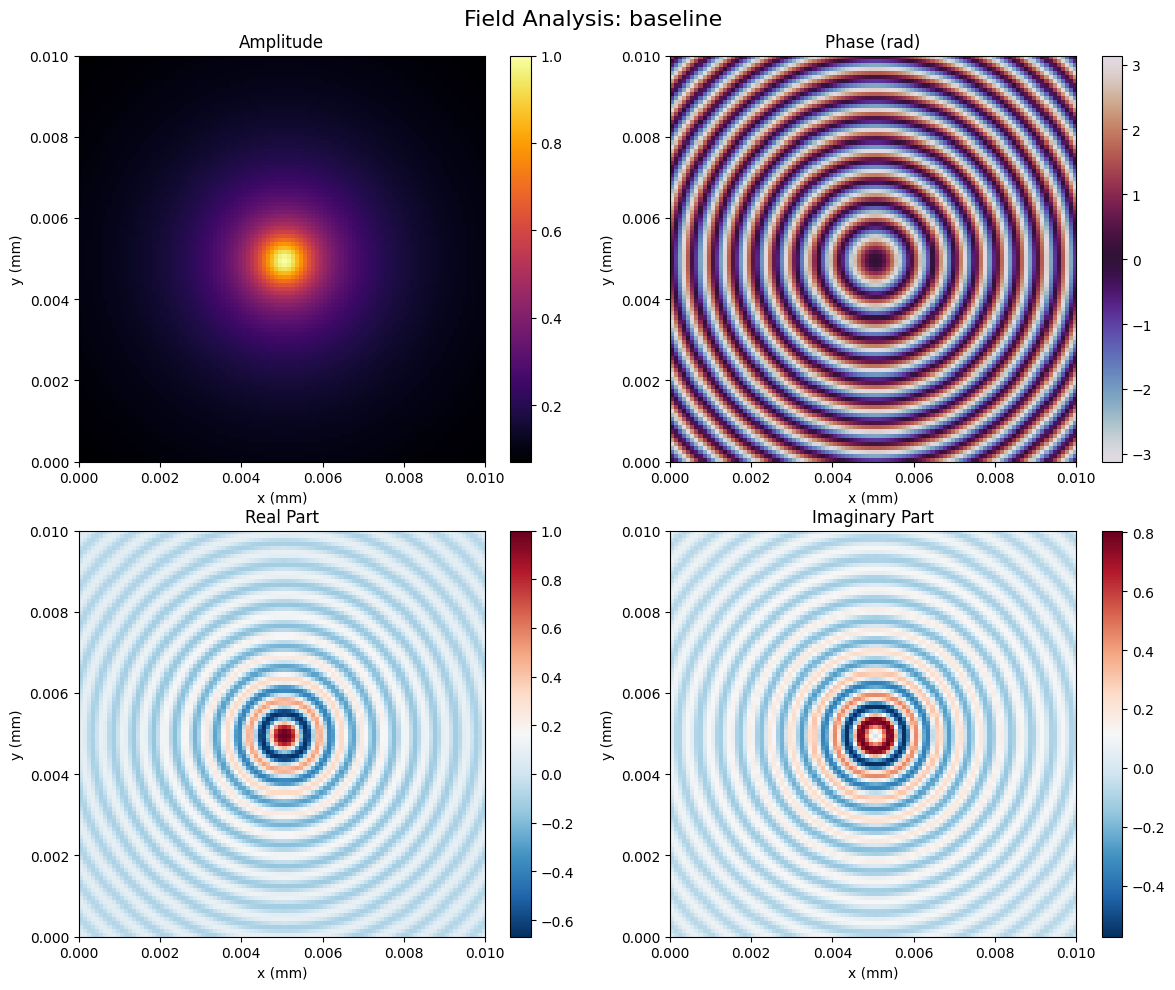

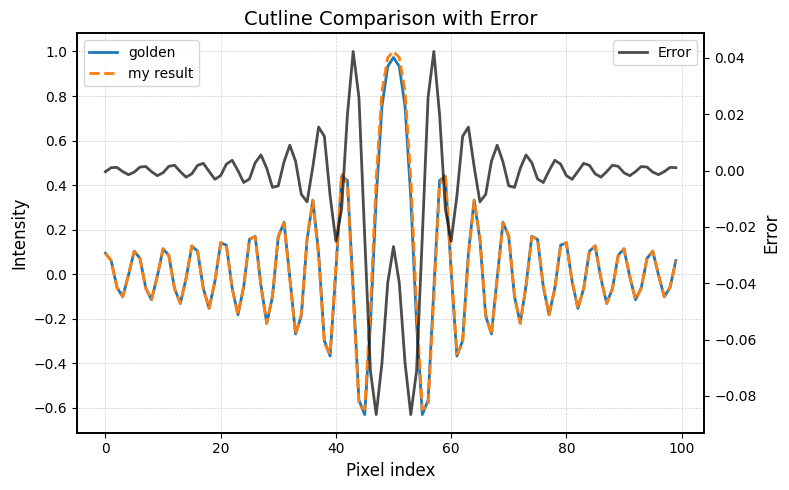

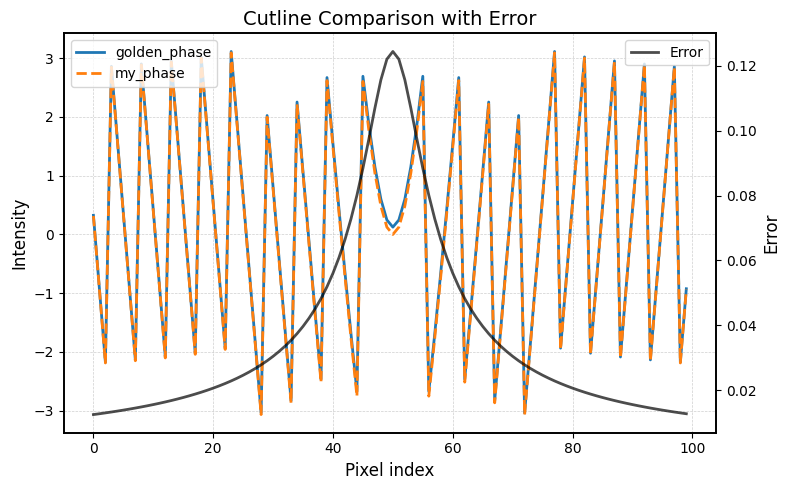

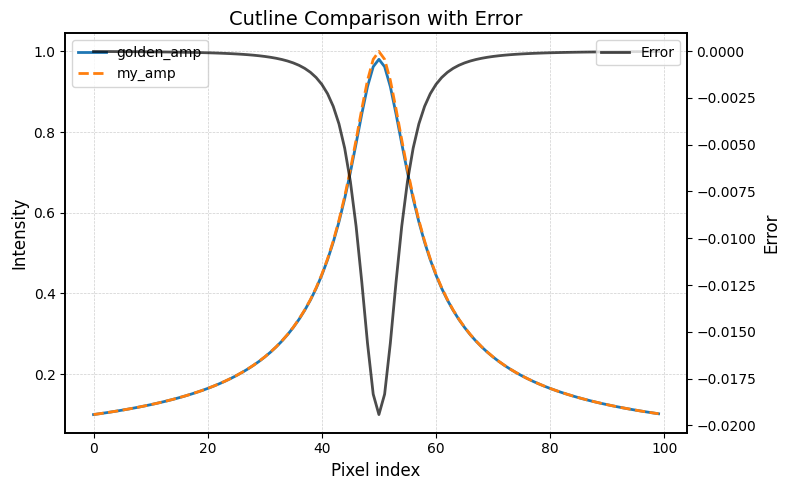

* spherical wave with z=0.75um
    max error = 0.6093588088120399


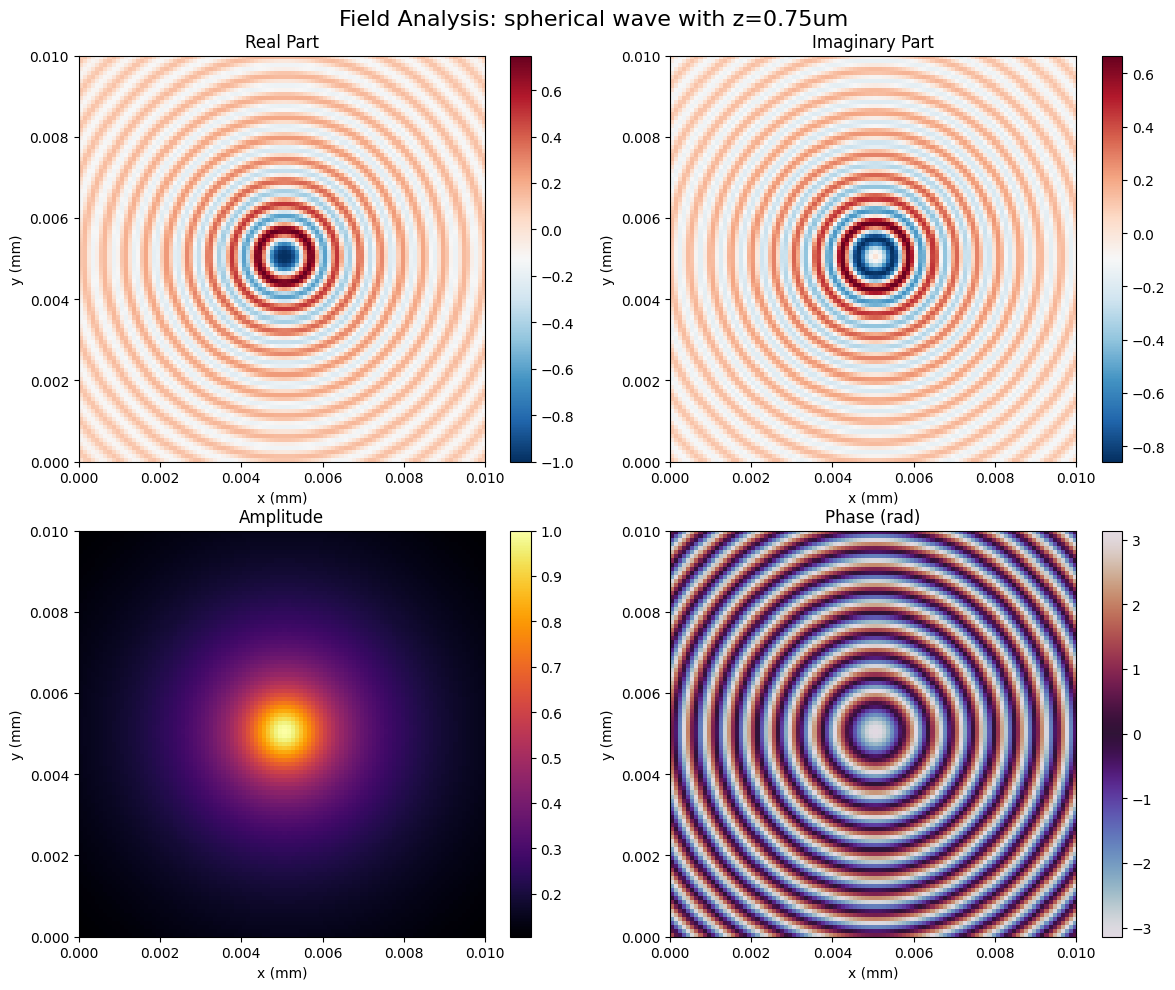

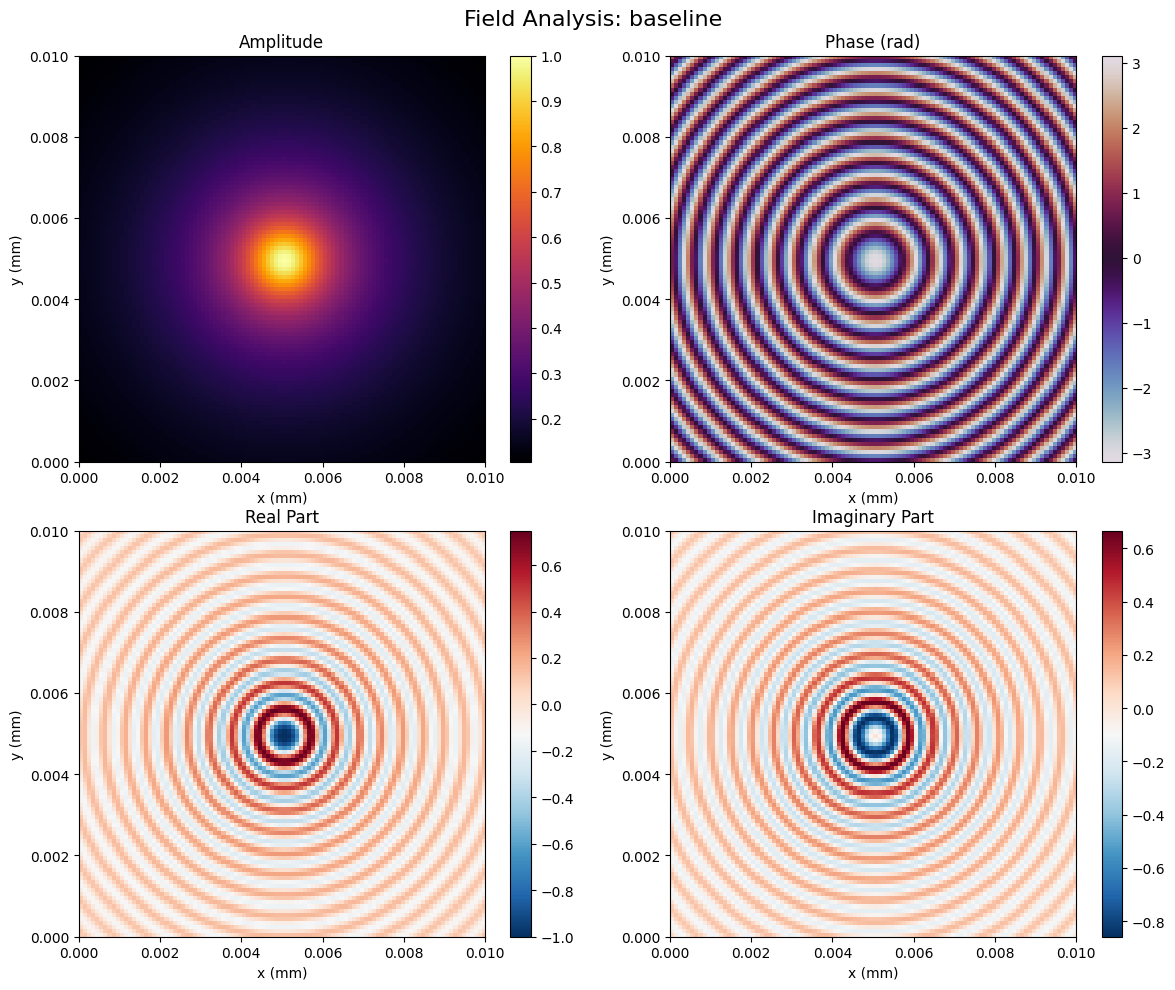

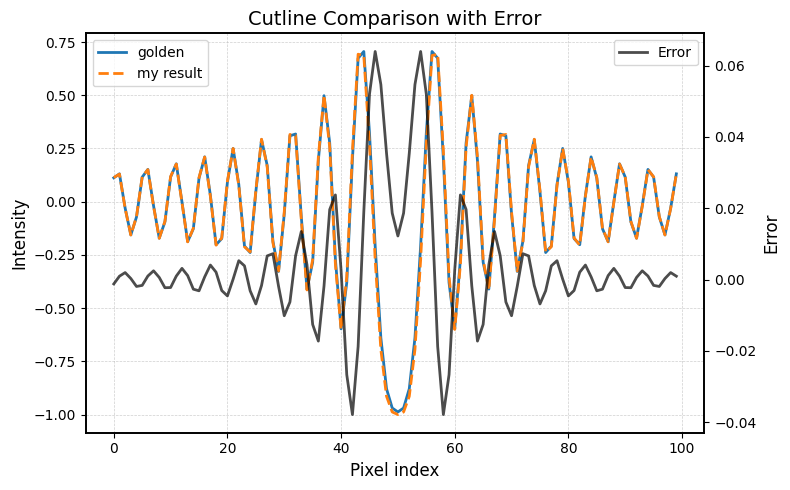

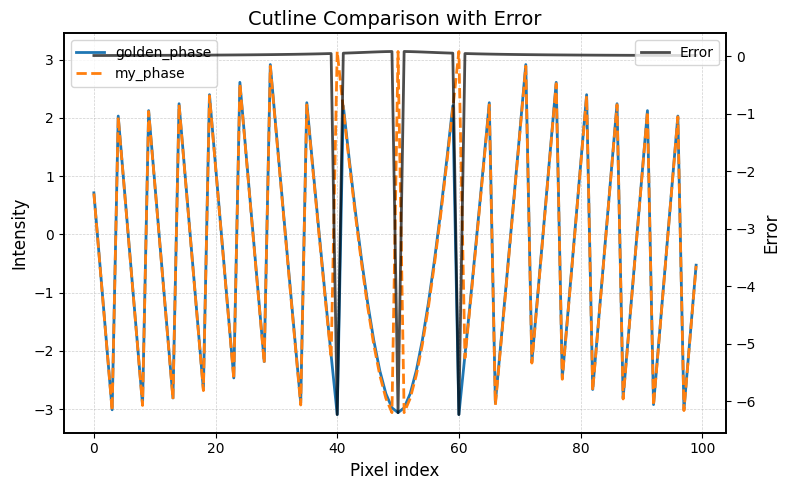

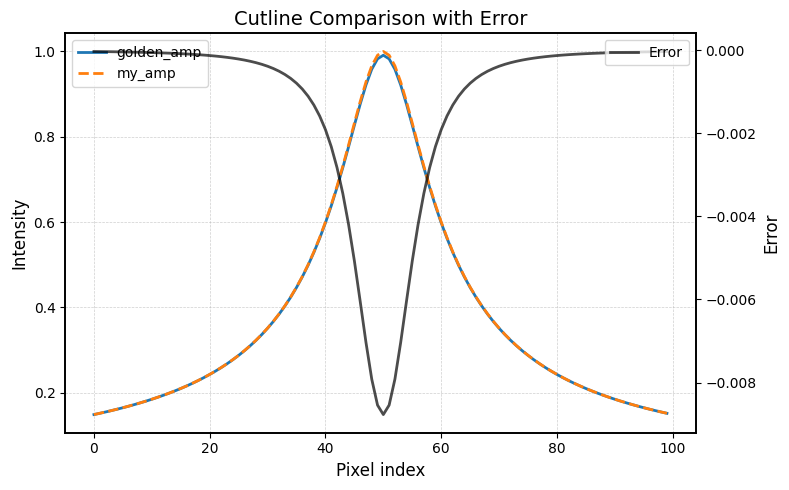

* spherical wave with z=1.0um
    max error = 0.6089484312442046


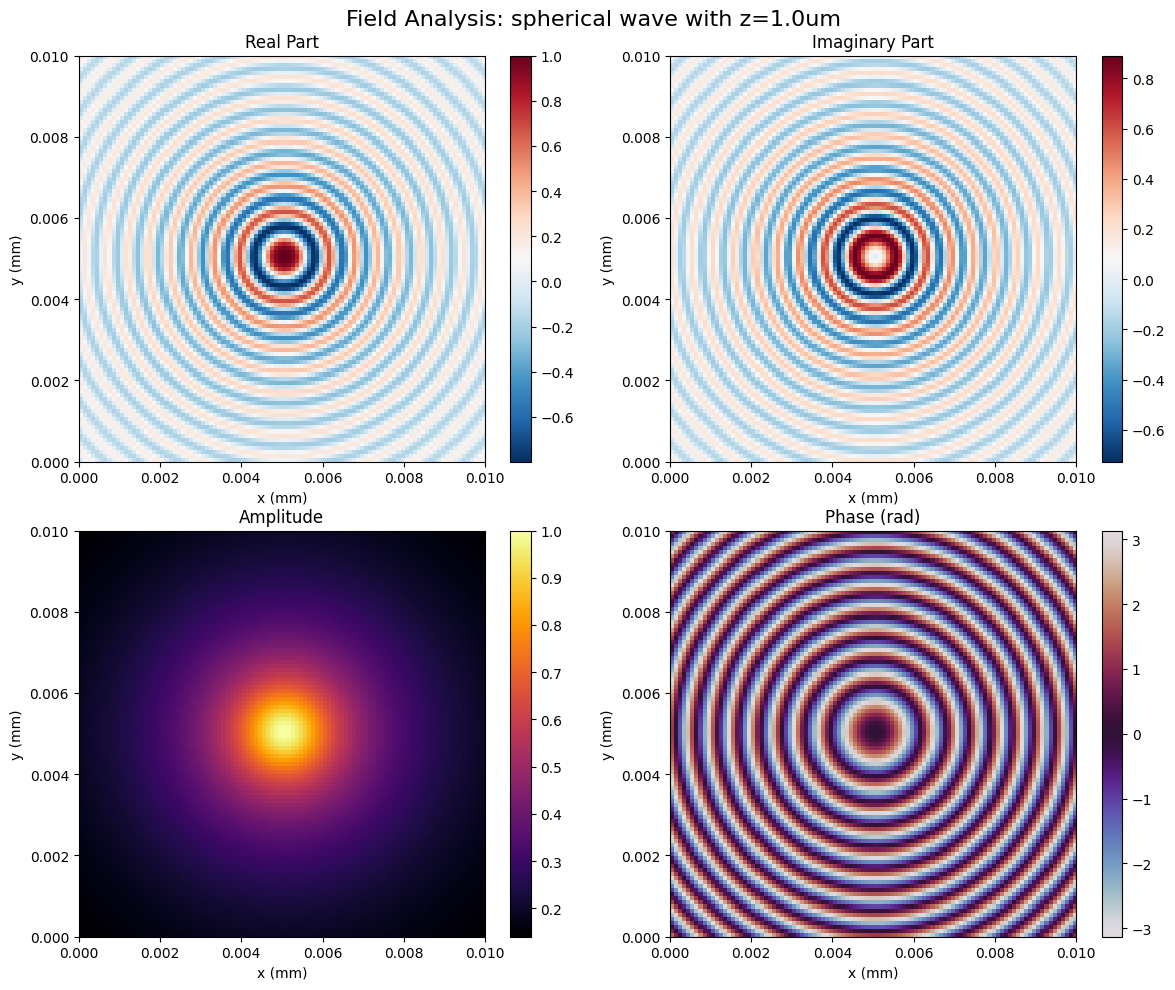

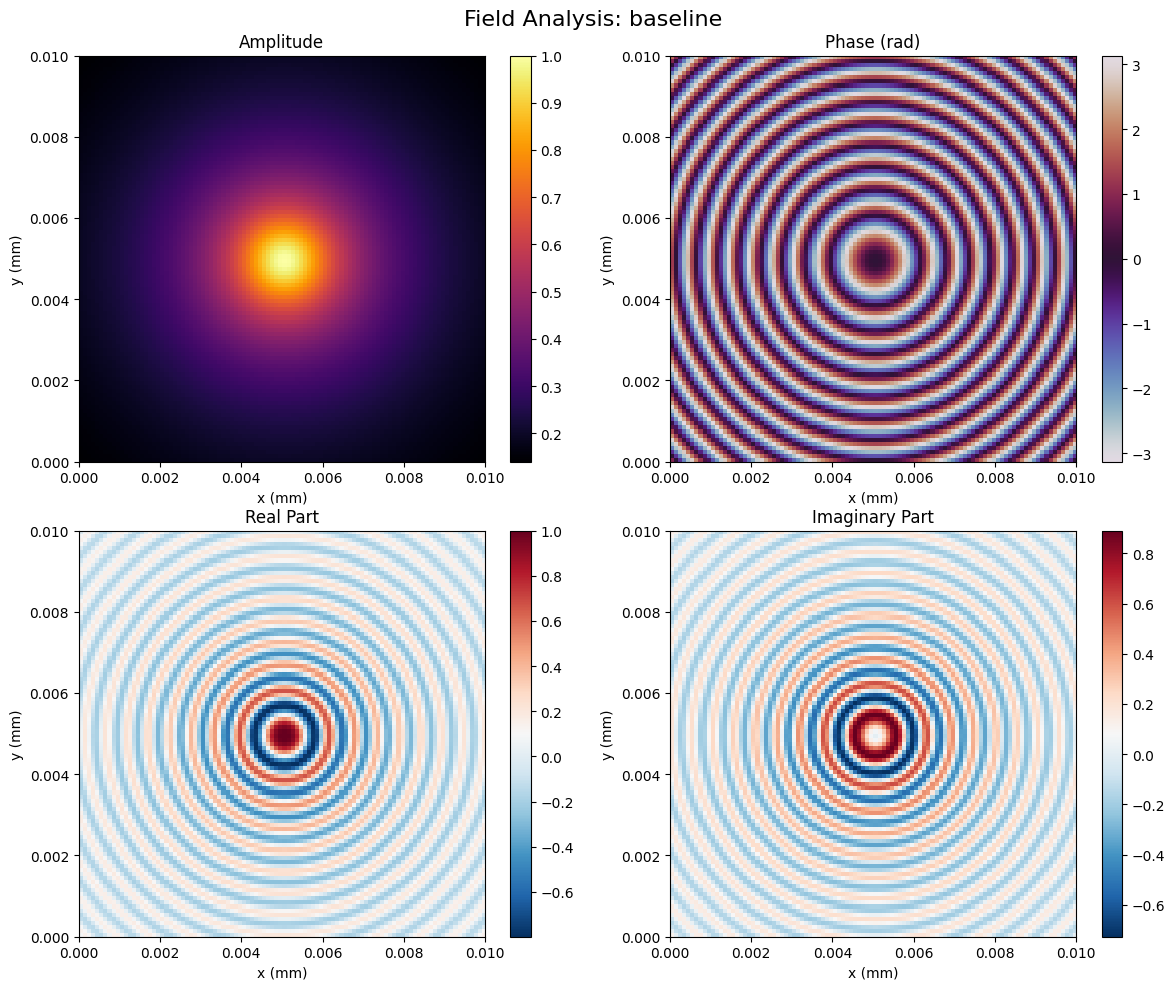

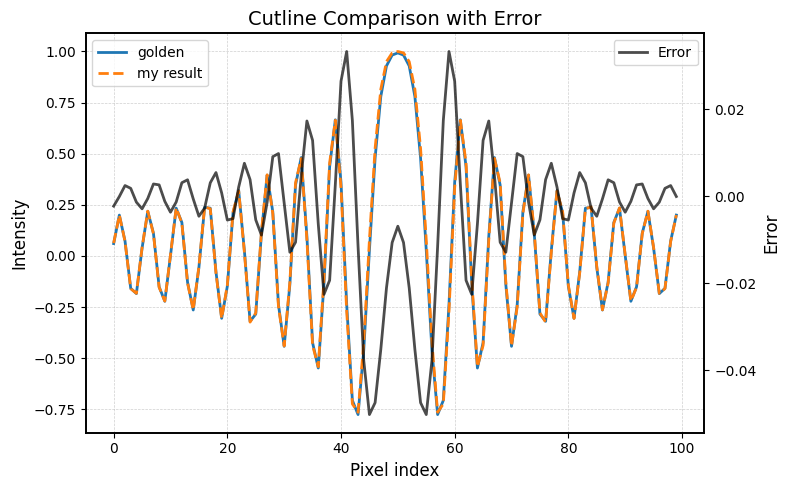

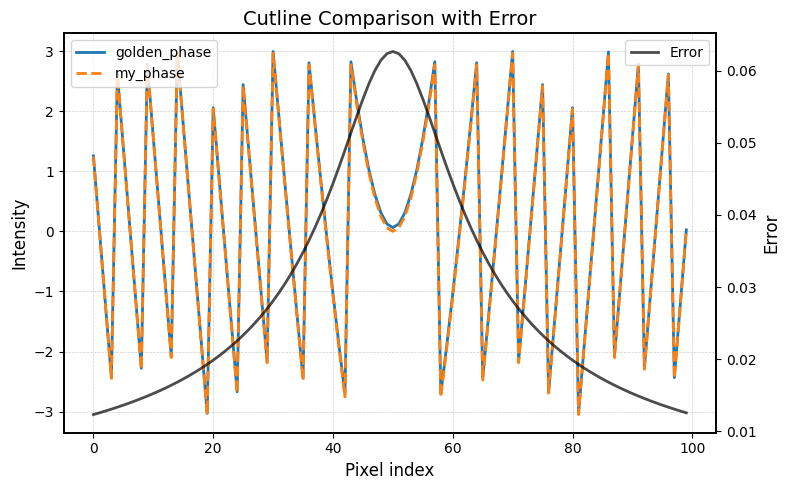

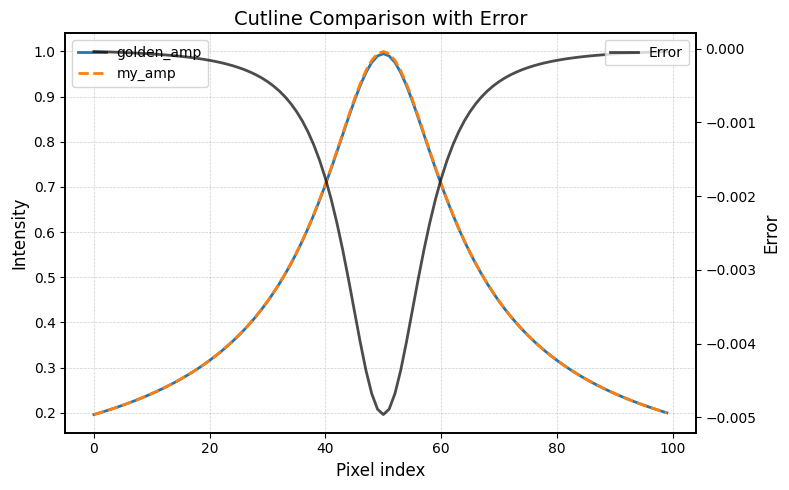

In [6]:
def spherical_wave_test(z_ratio):
    z = z_ratio*wavelength
    print(f"* spherical wave with z={z}um")
    
    # plane_wave_solver
    image = spherical_wave.generate(wavelength, z, start, end, shape)
    image = np.array(list(image)).reshape(*shape)
    fig = show_complex_plot(image, meta, f"spherical wave with z={z}um")
    
    # baseline
    baseline = f"{notebook_dir}/golden_data/{z_ratio}.fin"
    baseline_meta, baseline = parse_file(baseline)

    error = baseline-image
    max_error = np.max(np.abs(error))

    print(f"    max error = {max_error}")
    if max_error > 1e-6:
        a, b = get_cutline(baseline, shape[0]//2), get_cutline(image, shape[0]//2)
        show_golden_image = True
        if show_golden_image:
            fig = show_complex_plot(baseline, baseline_meta, "baseline", [[1, 0], [1, 1], [0,0], [0,1]])
        plot_cutlines_with_error(a, b, "golden", "my result")
        plot_cutlines_with_error(np.angle(a), np.angle(b), "golden_phase", "my_phase")
        plot_cutlines_with_error(np.abs(a), np.abs(b), "golden_amp", "my_amp")


for z_ratio in [0.5, 1, 1.5, 2]:
    spherical_wave_test(z_ratio)